In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import pathlib
import pickle

In [0]:
path = pathlib.Path('./drive/My Drive/Kaggle/Titanic')

In [0]:
with open(path/'feature_tensor.pickle', 'rb') as f:
    features = pickle.load(f)

with open(path/'label_tensor.pickle', 'rb') as f:
    labels = pickle.load(f)

In [0]:
features = features.float()
labels = labels.float()

In [0]:
import math
valid_size = -1 * math.floor(0.2*len(features))

train_features = features[:valid_size]
valid_features = features[valid_size:]

train_labels = labels[:valid_size]
valid_labels = labels[valid_size:]

In [0]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.h_l1=nn.Linear(18,10)
        self.h_bn1 = nn.BatchNorm1d(10)
        # self.h_l2 = nn.Linear(10, 6)
        # self.h_bn2 = nn.BatchNorm1d(64)
        self.o_l = nn.Linear(10, 2)

    def forward(self, x):
        # x = F.relu(self.h_l1(x))
        x = self.h_bn1(F.relu(self.h_l1(x)))
        # x = F.relu(self.h_l2(x))
        # x = self.h_bn2(F.relu(self.h_l2(x)))
        return self.o_l(x) 

In [0]:
model = Model()

In [9]:
model

Model(
  (h_l1): Linear(in_features=18, out_features=10, bias=True)
  (h_bn1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (o_l): Linear(in_features=10, out_features=2, bias=True)
)

In [10]:
model.to('cuda')

Model(
  (h_l1): Linear(in_features=18, out_features=10, bias=True)
  (h_bn1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (o_l): Linear(in_features=10, out_features=2, bias=True)
)

In [0]:
loss_fn = nn.MSELoss()

In [0]:
def train(epoch, lr=0.001, batch_size=10, plot_loss=True):
    optimizer = optim.Adam(model.parameters(), weight_decay=1e-2, lr=lr)
    loss = []
    for EPOCH in range(0, epoch):
        for i in range(0, len(train_features), batch_size):
            train_feature_batch = train_features[i:i+batch_size,:].to('cuda')
            train_label_batch = train_labels[i:i+batch_size,:].to('cuda')
            validity_index = random.randint(0,len(valid_features)-10)
            valid_feature_batch = valid_features[validity_index:validity_index+batch_size,:].to('cuda')
            valid_label_batch = valid_labels[validity_index:validity_index+batch_size,:].to('cuda')
            train_loss = loss_fn(model(train_feature_batch), train_label_batch)
            loss.append(train_loss)
            with torch.no_grad():
                valid_loss = loss_fn(model(valid_feature_batch), valid_label_batch)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
        print(f"Epoch : {EPOCH+1}\tTrain Loss : {train_loss}\tValid Loss : {valid_loss}")
    if plot_loss:
        plt.plot(loss)
        plt.show()

Epoch : 1	Train Loss : 0.41431283950805664	Valid Loss : 0.5997177362442017
Epoch : 2	Train Loss : 0.3166104257106781	Valid Loss : 0.4942118525505066
Epoch : 3	Train Loss : 0.2462013214826584	Valid Loss : 0.2280861884355545
Epoch : 4	Train Loss : 0.2130005806684494	Valid Loss : 0.2116510421037674
Epoch : 5	Train Loss : 0.21212612092494965	Valid Loss : 0.14308904111385345
Epoch : 6	Train Loss : 0.21700699627399445	Valid Loss : 0.18765313923358917
Epoch : 7	Train Loss : 0.22039633989334106	Valid Loss : 0.3388059139251709
Epoch : 8	Train Loss : 0.22850008308887482	Valid Loss : 0.11912981420755386
Epoch : 9	Train Loss : 0.22799526154994965	Valid Loss : 0.16027860343456268
Epoch : 10	Train Loss : 0.22838492691516876	Valid Loss : 0.130706325173378
Epoch : 11	Train Loss : 0.22712580859661102	Valid Loss : 0.17976975440979004
Epoch : 12	Train Loss : 0.22670646011829376	Valid Loss : 0.13536623120307922
Epoch : 13	Train Loss : 0.228249192237854	Valid Loss : 0.11441166698932648
Epoch : 14	Train Los

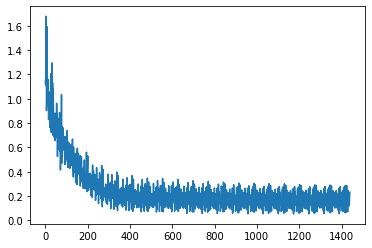

In [13]:
train(20)

In [14]:
model.to('cpu')

Model(
  (h_l1): Linear(in_features=18, out_features=10, bias=True)
  (h_bn1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (o_l): Linear(in_features=10, out_features=2, bias=True)
)

In [0]:
with open(path/'model.pickle', 'wb') as f:
    pickle.dump(model, f)